In [1]:
import requests
from datetime import datetime
import datetime
import pandas as pd
from textblob import TextBlob
import sqlite3
import praw

In [2]:
from credentials import credentials

In [3]:
client_id, client_secret,password, user_agent, username = credentials

In [4]:
reddit = praw.Reddit(
    client_id=client_id,
    client_secret=client_secret,
    password=password,
    user_agent=user_agent,
    username=username,
)

In [5]:
print(reddit.user.me())

JustAnotherCogg


In [6]:
print(reddit.read_only)

False


In [ ]:
top_posts = reddit.subreddit('worldnews').top(time_filter='day',limit=30)
i = 1

connection = sqlite3.connect('MSC.db')
cursor = connection.cursor()
sql = ('Select * from top30')
z = pd.read_sql_query(sql,connection)

for post in top_posts:
    atbilde =[]
    atbilde.append(str(datetime.datetime.now()))
    atbilde.append(str(i))
    for j in z.columns[2:]:
        try:
            atbilde.append(str(eval("post."+j)))
        except:
            atbilde.append("")

    for m in vars(post):
        if m not in z.columns[2:]:
            print(m)
    
    connection = sqlite3.connect('MSC.db')
    cursor = connection.cursor()
    sql2 = ("insert INTO top30('moment', 'daily_rank', 'comment_limit', 'comment_sort', '_reddit', 'approved_at_utc', 'subreddit', 'selftext', 'author_fullname', 'saved', 'mod_reason_title', 'gilded', 'clicked', 'title', 'link_flair_richtext', 'subreddit_name_prefixed', 'hidden', 'pwls', 'link_flair_css_class', 'downs', 'top_awarded_type', 'hide_score', 'name', 'quarantine', 'link_flair_text_color', 'upvote_ratio', 'author_flair_background_color', 'subreddit_type', 'ups', 'total_awards_received', 'media_embed', 'author_flair_template_id', 'is_original_content', 'user_reports', 'secure_media', 'is_reddit_media_domain', 'is_meta', 'category', 'secure_media_embed', 'link_flair_text', 'can_mod_post', 'score', 'approved_by', 'author_premium', 'thumbnail', 'edited', 'author_flair_css_class', 'author_flair_richtext', 'gildings', 'content_categories', 'is_self', 'mod_note', 'created', 'link_flair_type', 'wls', 'removed_by_category', 'banned_by', 'author_flair_type', 'domain', 'allow_live_comments', 'selftext_html', 'likes', 'suggested_sort', 'banned_at_utc', 'url_overridden_by_dest', 'view_count', 'archived', 'no_follow', 'is_crosspostable', 'pinned', 'over_18', 'all_awardings', 'awarders', 'media_only', 'can_gild', 'spoiler', 'locked', 'author_flair_text', 'treatment_tags', 'visited', 'removed_by', 'num_reports', 'distinguished', 'subreddit_id', 'mod_reason_by', 'removal_reason', 'link_flair_background_color', 'id', 'is_robot_indexable', 'report_reasons', 'author', 'discussion_type', 'num_comments', 'send_replies', 'whitelist_status', 'contest_mode', 'mod_reports', 'author_patreon_flair', 'author_flair_text_color', 'permalink', 'parent_whitelist_status', 'stickied', 'url', 'subreddit_subscribers', 'created_utc', 'num_crossposts', 'media', 'is_video', '_fetched', '_comments_by_id', 'author_cakeday', 'flair', 'link_flair_template_id', 'num_duplicates', 'post_hint', 'preview', 'thumbnail_height', 'thumbnail_width','_comments') VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)")
    cursor.execute(sql2, atbilde)          
    connection.commit()
    connection.close()
    
    i +=1

In [ ]:
connection = sqlite3.connect('MSC.db')
cursor = connection.cursor()

sql = ("Select * from top30 where moment>date('now')")
z = pd.read_sql_query(sql,connection)

In [ ]:
for l, m in(zip(z.daily_rank ,z.title)):
    print(l, m[:50])

In [ ]:
import shutil
newPath = shutil.copy('MSC.db', '/Users/Edite/Documents/GitHub/MscAston/MSC')

In [ ]:
# For fuckups

connection = sqlite3.connect('MSC.db')
cursor = connection.cursor()
cursor.executescript("delete from top30 where moment == '20/03/2021  20:00:00'")
#z = pd.read_sql_query(sql,connection)

In [ ]:
df.to_sql('top30', connection, if_exists='append',index=False)

In [12]:
from datetime import datetime
print(datetime.utcfromtimestamp(post.created_utc).strftime('%Y-%m-%d %H:%M:%S'))

2021-03-26 17:13:33


In [13]:
print(datetime.datetime.utcnow().strftime("%s"))

AttributeError: type object 'datetime.datetime' has no attribute 'datetime'

In [ ]:
a = '2021-03-19 18:03:35'

In [ ]:
b = '2021-03-20 20:00:00'

# For back engineering
## Add for loop for 1-9 March

top_posts = reddit.subreddit('worldnews').top(time_filter='week',limit=300)
i = 1

connection = sqlite3.connect('MSC.db')
cursor = connection.cursor()
sql = ('Select * from top30')
z = pd.read_sql_query(sql,connection)
atbilde =[]
for post in top_posts:
    
    if str(eval("post.created_utc")) > datetime.datetime.strptime(a, '%Y-%m-%d %H:%M:%S').strftime("%s") and str(eval("post.created_utc")) < datetime.datetime.strptime(b, '%Y-%m-%d %H:%M:%S').strftime("%s") and i <31:
        atbilde =[]
        atbilde.append('20/03/2021  20:00:00')
        atbilde.append(str(i))
        for j in z.columns[2:]:
            try:
                atbilde.append(str(eval("post."+j)))
            except:
                atbilde.append("")

        for m in vars(post):
            if m not in z.columns[2:]:
                print(m)

        connection = sqlite3.connect('MSC.db')
        cursor = connection.cursor()
        sql2 = ("insert INTO top30('moment', 'daily_rank', 'comment_limit', 'comment_sort', '_reddit', 'approved_at_utc', 'subreddit', 'selftext', 'author_fullname', 'saved', 'mod_reason_title', 'gilded', 'clicked', 'title', 'link_flair_richtext', 'subreddit_name_prefixed', 'hidden', 'pwls', 'link_flair_css_class', 'downs', 'top_awarded_type', 'hide_score', 'name', 'quarantine', 'link_flair_text_color', 'upvote_ratio', 'author_flair_background_color', 'subreddit_type', 'ups', 'total_awards_received', 'media_embed', 'author_flair_template_id', 'is_original_content', 'user_reports', 'secure_media', 'is_reddit_media_domain', 'is_meta', 'category', 'secure_media_embed', 'link_flair_text', 'can_mod_post', 'score', 'approved_by', 'author_premium', 'thumbnail', 'edited', 'author_flair_css_class', 'author_flair_richtext', 'gildings', 'content_categories', 'is_self', 'mod_note', 'created', 'link_flair_type', 'wls', 'removed_by_category', 'banned_by', 'author_flair_type', 'domain', 'allow_live_comments', 'selftext_html', 'likes', 'suggested_sort', 'banned_at_utc', 'url_overridden_by_dest', 'view_count', 'archived', 'no_follow', 'is_crosspostable', 'pinned', 'over_18', 'all_awardings', 'awarders', 'media_only', 'can_gild', 'spoiler', 'locked', 'author_flair_text', 'treatment_tags', 'visited', 'removed_by', 'num_reports', 'distinguished', 'subreddit_id', 'mod_reason_by', 'removal_reason', 'link_flair_background_color', 'id', 'is_robot_indexable', 'report_reasons', 'author', 'discussion_type', 'num_comments', 'send_replies', 'whitelist_status', 'contest_mode', 'mod_reports', 'author_patreon_flair', 'author_flair_text_color', 'permalink', 'parent_whitelist_status', 'stickied', 'url', 'subreddit_subscribers', 'created_utc', 'num_crossposts', 'media', 'is_video', '_fetched', '_comments_by_id', 'author_cakeday', 'flair', 'link_flair_template_id', 'num_duplicates', 'post_hint', 'preview', 'thumbnail_height', 'thumbnail_width','_comments') VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)")
        cursor.execute(sql2, atbilde)          
        connection.commit()
        connection.close()

        i +=1

In [80]:
connection = sqlite3.connect('MSC.db')
cursor = connection.cursor()

sql = ("Select* from top30 where moment < '2021-03-19 18:03:35' ")
z = pd.read_sql_query(sql,connection)

In [83]:
z.title.value_counts()

Thousands rally at Australia's parliament to demand justice for sexual assault victims                                           2
Russia and Iran tried to interfere with 2020 election, U.S. intelligence agencies say                                            2
Poland to ban gays from adopting, even as single parents                                                                         2
Pfizer/BioNTech COVID-19 vaccine neutralizes Brazil variant in lab study                                                         2
Man who rammed the gates of Rideau Hall, and entered the grounds in an attempt to "arrest" Mr Trudeau gets six years in jail.    1
                                                                                                                                ..
Netanyahu turns to extremist party that calls for expelling Arabs from Israel                                                    1
Mexico Passes Bill to Legalize Cannabis                                            

https://pynative.com/python-sqlite-update-table/

In [85]:
z[z.title == "Thousands rally at Australia's parliament to demand justice for sexual assault victims"].to_excel('findingtnemo.xlsx')

In [58]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
connection = sqlite3.connect('MSC.db')
cursor = connection.cursor()

sql = ("Select count(*) over (partition by title) as 'cunt',* from top30 where moment < '2021-03-19 18:03:35'  ")
z = pd.read_sql_query(sql,connection)
z

,cunt,moment,daily_rank,comment_limit,comment_sort,_reddit,approved_at_utc,subreddit,selftext,author_fullname,...,_comments_by_id,_comments,author_cakeday,flair,link_flair_template_id,num_duplicates,post_hint,preview,thumbnail_height,thumbnail_width
0,1,2021-03-10 20:29:51.616452,21,2048,confidence,<praw.reddit.Reddit object at 0x7fee19037b90>,None,worldnews,,t2_8iffcmpj,...,{},140,,,<praw.models.reddit.submission.SubmissionFlair...,,8,link,{'images': [{'source': {'url': 'https://extern...,73
1,1,2021-03-13 20:50:38.421046,9,2048,confidence,<praw.reddit.Reddit object at 0x7fcbd2d6fad0>,None,worldnews,,t2_7fynvpg0,...,{},140,,,<praw.models.reddit.submission.SubmissionFlair...,,9,link,{'images': [{'source': {'url': 'https://extern...,73
2,1,20/03/2021 20:00:00.554220,10,2048,confidence,<praw.reddit.Reddit object at 0x7f9df13eb350>,None,worldnews,,t2_hpo2f,...,{},140,,,<praw.models.reddit.submission.SubmissionFlair...,,7,link,{'images': [{'source': {'url': 'https://extern...,78
3,1,2021-03-10 20:29:43.336869,9,2048,confidence,<praw.reddit.Reddit object at 0x7fee19037b90>,None,worldnews,,t2_as9fz18e,...,{},140,,,<praw.models.reddit.submission.SubmissionFlair...,,5,link,{'images': [{'source': {'url': 'https://extern...,78
4,1,2021-03-09 20:07:06.347798,24,2048,confidence,<praw.reddit.Reddit object at 0x7fce86cedb10>,None,worldnews,,t2_ijvzn,...,{},140,,,<praw.models.reddit.submission.SubmissionFlair...,,0,link,{'images': [{'source': {'url': 'https://extern...,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,1,2021-03-16 21:19:09.886681,27,2048,confidence,<praw.reddit.Reddit object at 0x7f91554efb10>,None,worldnews,,t2_9gahrr9x,...,{},140,,,<praw.models.reddit.submission.SubmissionFlair...,,0,link,{'images': [{'source': {'url': 'https://extern...,78
326,1,2021-03-11 22:00:17.123898,17,2048,confidence,<praw.reddit.Reddit object at 0x7fdab056eb10>,None,worldnews,,t2_10a20y,...,{},140,,,<praw.models.reddit.submission.SubmissionFlair...,,2,link,{'images': [{'source': {'url': 'https://extern...,93
327,1,2021-03-10 20:29:44.080657,10,2048,confidence,<praw.reddit.Reddit object at 0x7fee19037b90>,None,worldnews,,t2_ko28z,...,{},140,,,<praw.models.reddit.submission.SubmissionFlair...,,4,link,{'images': [{'source': {'url': 'https://extern...,73
328,1,20/03/2021 20:00:00.554220,12,2048,confidence,<praw.reddit.Reddit object at 0x7f9df13eb350>,None,worldnews,,t2_1rrfa628,...,{},140,,,<praw.models.reddit.submission.SubmissionFlair...,,2,link,{'images': [{'source': {'url': 'https://extern...,104


<AxesSubplot:>

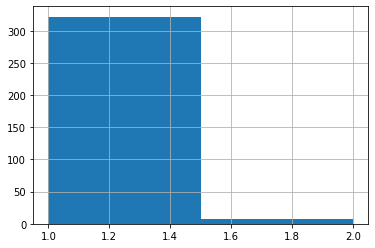

In [19]:
z.cunt.hist(bins = max(z.cunt))

In [17]:
%matplotlib inline

In [21]:
s = z[z.cunt == 2]

In [23]:
s.to_excel('findingnemo.xlsx')